# Milestones 4 & 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [2]:
df = pd.DataFrame(pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv"))

## How many different companies are represented in the data set?


In [3]:
df["Company Name"].info
len(df["Company Name"].unique())
#df["Company Name"]
print('There are %2d unique companies in the dataset.' % len(df["Company Name"].unique()))

There are 439 unique companies in the dataset.


## What is the total number of jobs created for businesses in Queens?

In [4]:
gb = df.groupby(['City'])
gb.get_group("Queens")["Job created"].sum()
print('There were %d jobs created for Queens businesses.' % gb.get_group("Queens")["Job created"].sum())

There were 90 jobs created for Queens businesses.


## How many different unique email domains names are there in the data set?

In [5]:
domain_split = df["company email"].dropna().apply(lambda em: em.split("@"))
domains = df["company email"].dropna().apply(lambda em: em.split("@")[-1])

[x for x in domains if len(x)==1]

print('There are %d different email domains in the dataset.' %len(domains.unique()))

There are 361 different email domains in the dataset.


## Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?


In [6]:
df['freq_count'] = df.groupby("NTA")["NTA"].transform('count')
df1 = df[df['freq_count']>4]

In [7]:
group_obj1 = df1.groupby('NTA')[['freq_count','NTA','Savings from beginning receiving benefits','Job created']]
df2 = group_obj1.agg(Savings=pd.NamedAgg(column='Savings from beginning receiving benefits',aggfunc = 'mean'),
                    TotalJobsCreated=pd.NamedAgg(column='Job created',aggfunc = 'sum'), 
                     Count=pd.NamedAgg(column='freq_count',aggfunc = 'mean'))
df2.round(2)

,Savings,TotalJobsCreated,Count
NTA,,,
Battery Park City-Lower Manhattan,3798151.24,0.0,9.0
Bushwick South,307800.03,10.0,10.0
Carroll Gardens-Columbia Street-Red Hook,184683.95,0.0,11.0
College Point,574250.81,2.0,7.0
Crown Heights North,17168.97,0.0,9.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,437390.50,0.0,10.0
East New York,457945.40,15.0,9.0
East Williamsburg,143369.48,0.0,11.0
Greenpoint,177222.06,0.0,14.0


In [8]:
df2.to_csv('NTAs_5_businesses.csv')

# Milestone 5

## Scatter plot of jobs created versus average savings with both a standard and a logarithmic scale for the average savings

Text(0, 0.5, 'Savings (regular scale)')

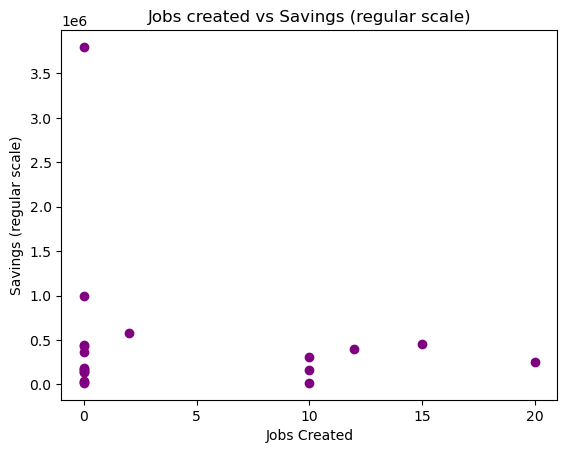

In [9]:
x=df2.TotalJobsCreated
y=df2.Savings
fig, ax = plt.subplots()
ax.scatter(x,y,color='purple')
ax.set_title('Jobs created vs Savings (regular scale)')
ax.set_xticks(np.arange(0,25,5))
ax.set_xlabel('Jobs Created')
ax.set_ylabel('Savings (regular scale)')
#ax.set_yscale("log")
#fig.show()

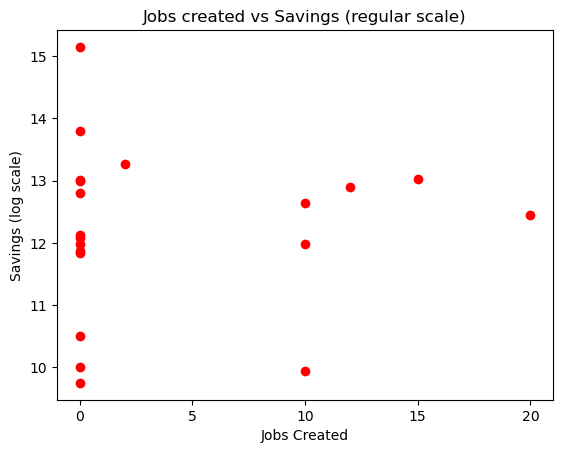

In [10]:
fig, ax = plt.subplots()
ax.scatter(x,np.log(y),color='red')
ax.set_title('Jobs created vs Savings (regular scale)')
ax.set_xlabel('Jobs Created')
ax.set_ylabel('Savings (log scale)')
ax.set_xticks(np.arange(0,25,5))

## Histogram of the log of the average total savings

(array([3., 1., 0., 2., 4., 5., 3., 1., 0., 1.]),
 array([ 9.75085877, 10.29077539, 10.83069201, 11.37060864, 11.91052526,
        12.45044188, 12.9903585 , 13.53027512, 14.07019175, 14.61010837,
        15.15002499]),
 <BarContainer object of 10 artists>)

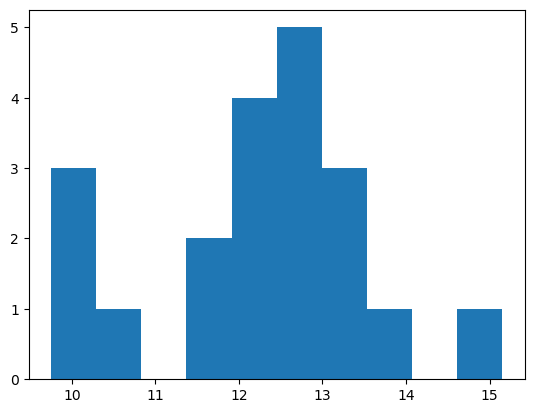

In [11]:
plt.hist(np.log(y))

In [12]:
df['months'] = [month.split('/')[0] for month  in df['Effective Date'] ]
gbm = df.groupby(['months'])['Job created'].mean()

Text(0.5, 0, 'Months')

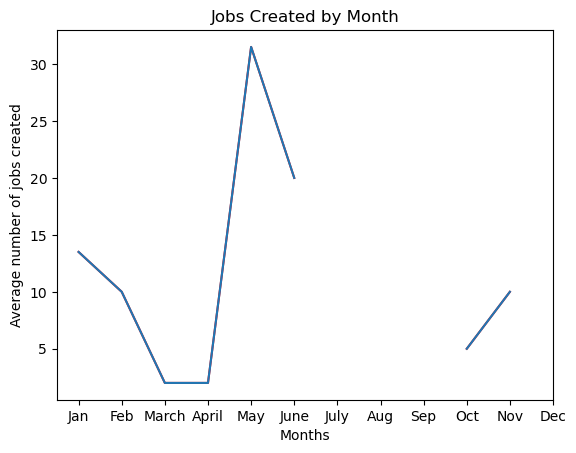

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,12),gbm,color='red')
ax.set_title('Jobs Created by Month')
plt.plot(np.arange(0,12),gbm)
ax.set_ylabel('Average number of jobs created')
ax.set_xticks(np.arange(1,13),['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Months')